<a href="https://colab.research.google.com/github/Cyp202/2025_Intro_Python/blob/main/notebook/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

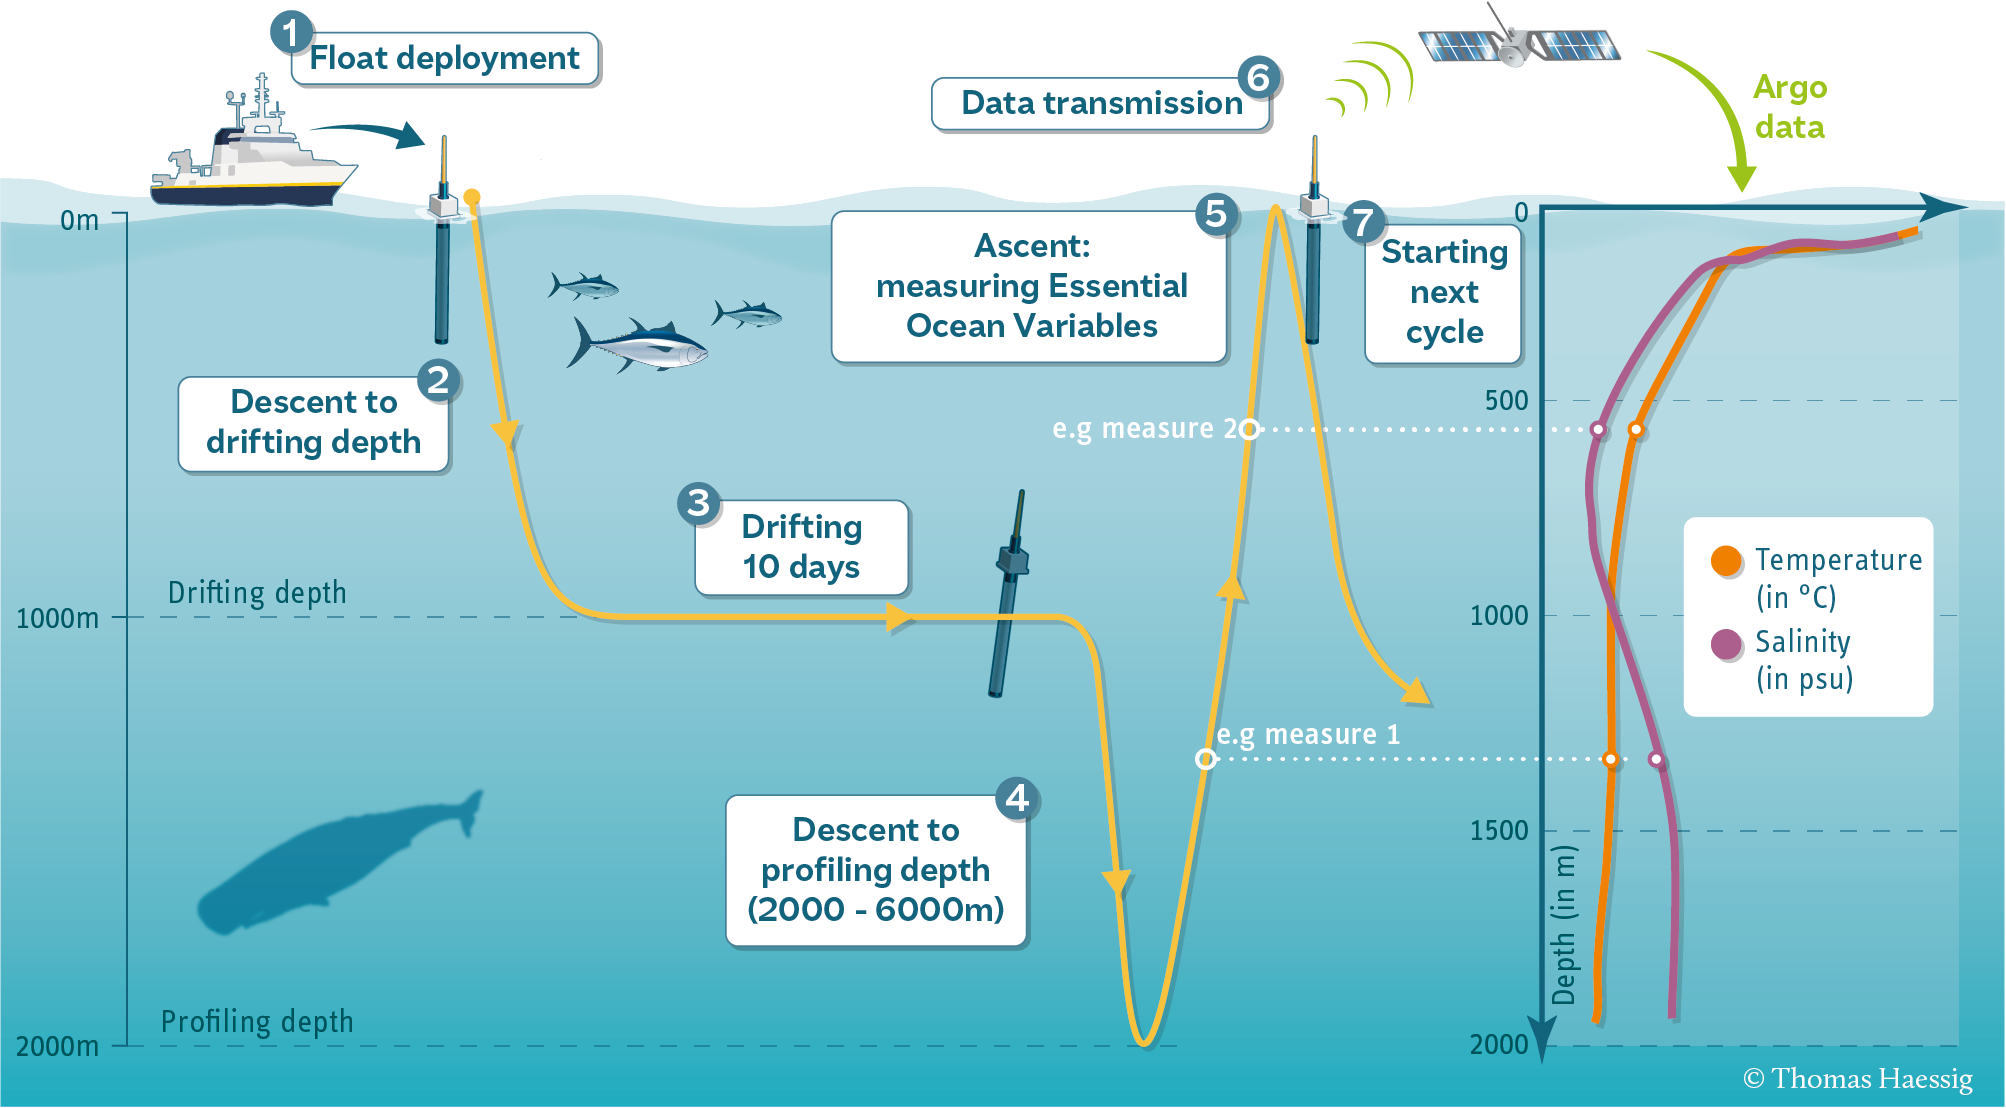


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [14]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']

manière de voir les données et donc fichier "non fair" car pas de métadonnée :

In [15]:
files[0] # fichier "non fair" car pas de métadonnée

'/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy'

In [16]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

Cette manière ne fonctionne pas car il faut faire attention que la definition corresponde bien au files ... VOIR MANIERE EFFICACE PLUS LOIN:

In [ ]:
#T = np.load(files[2])      # temperature
#print(T)
#S = np.load(files[0])      # salinity
#P = np.load(files[6])      # pressure
#date = np.load(files[5])   # date
#lat = np.load(files[3])    # latitude
#lon = np.load(files[4])    # longitude
#level = np.load(files[1])  # depth levels

#lat = np.load(files[0])    # latitude
#print(lat)
#S = np.load(files[1])      # salinity
#level = np.load(files[2])  # depth levels
#T = np.load(files[3])      # temperature
#lon = np.load(files[4])    # longitude
#date = np.load(files[5])   # date
#P = np.load(files[6])      # pressure

In [ ]:
MANIERE EFFICACE

In [17]:
date = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy')
lat = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy')
T = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy')
S = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy')
lon = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy')
level = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy')
P = np.load('/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy')
#print(lat)

*moi* : Pour vérifier :
to check:

In [9]:
print("T shape:", T.shape) #(78, 75)
print("S shape:", S.shape) #(78, 75)
print("P shape:", P.shape) #(78, 75)
print("lat shape:", lat.shape) #(75, )
print("lon shape:", lon.shape) #(75, )
print("date shape:", date.shape) #(75, )
print("level shape:", level.shape) #(78, )
#Ces shape font sens car T,S et P on les mêmes dimensions et lat et long aussi (que une colonne mais de même dimension) et level a le meme nombre de colonnes que T,S,P ce qui fait sens car ces mesures ont été prise le long de Level.
# These shapes make sense because T, S and P have the same dimensions and width and length (like a column but of the same size) and Level has the same number of columns as T, S and P, which makes sense because these measurements were taken along Level.
print(T)
print(P)
print(lat)
print(lon)
print(date)
print(level)


T shape: (78, 75)
S shape: (78, 75)
P shape: (78, 75)
lat shape: (75,)
lon shape: (75,)
date shape: (75,)
level shape: (78,)
[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]
[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.

Then, load the files as `numpy` arrays, for instance using list comprehension

In [ ]:
#T, S, level, lat, lon, date, P = [np.load(files[i]) for i in range(7)]

Ne fonctionne pas car les données T,S,level,... doivent être dans le même ordre que dans le fichier "brut" de données.

Fonctionne avec le code a trou:

In [13]:
print(files)

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy', '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']


In [19]:
date,lat,T,S,lon,level,P = [np.load(files[i]) for i in range(7)]

*mes* *recherches* : Explication

range(len(files)) → va de 0 à len(files)-1, donc tous les indices de files

[np.load(files[i]) for i in range(len(files))] → charge tous les fichiers dans un liste d’arrays

Ensuite, on décompresse la liste dans T, S, P, lat, lon, date, level.

⚠️ Attention : dans ce cas, il faut que l’ordre des fichiers dans files corresponde exactement à l’ordre T, S, P, lat, lon, date, level. Sinon il faudra encore utiliser la liste d’indices [2,0,6,3,4,5,1] pour être sûr.

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [22]:
print(level)
print("level shape:", level.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
level shape: (78,)


Recreate the `level` array using `np.arange` and call it `level_arange`

In [ ]:
moi:

In [21]:
print("level shape:", level.shape)

# Nombre de niveaux à générer
num_levels = level.shape[1]  # 75 colonnes

# Créer un tableau régulièrement espacés entre le min et le max réel, en ignorant les nan
level_arange = np.linspace(np.nanmin(level), np.nanmax(level), num_levels)

print(level_arange)


num_levels = level.shape[1]   # ou 78 selon la dimension que tu veux
level_arange = np.linspace(np.min(level), np.max(level), num_levels)

print(level_arange)

level shape: (78,)


IndexError: tuple index out of range

aide de moi

1) Calculer/ trouver le min et max (en ignorant les nan)
  # np.nanmin(level) #valeur minimale du tableau
  # np.nanmax(level) #valeur maximale du tableau

2)  Choisir un pas
  # num_levels = level.shape[0]  # 0=78 et askip 1=nombre de colonnes dans ton level 2D
  # step = (np.nanmax(level) - np.nanmin(level)) / (num_levels - 1)


# Créer le tableau avec np.arange
level_arange = np.arange(np.nanmin(level), np.nanmax(level)+step/2, step)  # ajouter step pour inclure stop

print(level_arange)

#print("level min/max:", np.nanmin(level), np.nanmax(level))
#print("level_arange min/max:", level_arange[0], level_arange[-1])



DEMANDER:

In [23]:
level_arange = np.arange(np.nanmin(level), np.nanmax(level)+1,1)

In [24]:
level_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77])

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

*MOI: pas utile*, théorie

---



In [25]:
num_vals = level.size  # nombre total d’éléments
start = np.nanmin(level)
stop = np.nanmax(level)

# on crée un arange qui a le même nombre d’éléments
step = (stop - start) / (num_vals - 1)
level_arange = np.arange(start, stop + step/2, step).reshape(level.shape)

print("level shape:", level.shape)
print("level_arange shape:", level_arange.shape)

# 2 Vérifier que ça colle mais tolérant aux flottants et aux nan
if np.allclose(level, level_arange, equal_nan=True):
    print(" level_arange correspond bien à level (mêmes dimensions et valeurs proches)")
else:
    print(" level_arange n’est pas identique mais au moins il est compatible")

# 3️ (Optionnel) vérifier juste min/max
print("min level:", np.nanmin(level), "min level_arange:", np.nanmin(level_arange))
print("max level:", np.nanmax(level), "max level_arange:", np.nanmax(level_arange))




level shape: (78,)
level_arange shape: (78,)
 level_arange correspond bien à level (mêmes dimensions et valeurs proches)
min level: 0 min level_arange: 0.0
max level: 77 max level_arange: 77.0


In [30]:
level_arange

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

In [26]:
np.testing.assert_equal(level,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

MOI: (Plus théoriquement)

print("level shape:", level.shape)

# Nombre de niveaux à générer
num_levels = level.shape[1]  # 75 colonnes

# Créer un tableau régulièrement espacés entre le min et le max réel, en ignorant les nan
level_arange = np.linspace(np.nanmin(level), np.nanmax(level), num_levels)

print(level_arange)


num_levels = level.shape[1]   # ou 78 selon la dimension que tu veux
level_arange = np.linspace(np.min(level), np.max(level), num_levels)

print(level_arange)

In [28]:
level_linspace = np.linspace(np.min(level), np.max(level),level.shape[0])


In [29]:
level_linspace

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.])

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [31]:
np.testing.assert_equal(level,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [ ]:
T.shape

(78, 75)

In [ ]:
S.shape

(78, 75)

In [ ]:
date.shape

(75,)

In [ ]:
level.shape

(78,)

In [ ]:
 print(lat.shape)
 print(lon.shape)

(75,)
(75,)


* moi : * check dimension:

In [ ]:
print(level.ndim)
print(T.ndim)
print(S.ndim)
print(P.ndim)
print(date.ndim)
print(lat.ndim)
print(lon.ndim)

1
2
2
2
1
1
1


Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [32]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [33]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.2 MB/s eta 0:00:00


Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature (Θ dans l'équation)

CT = gsw_CT_from_t(SA,t,p)

INPUT:

SA  =  Absolute Salinity                                         [ g/kg ]

t   =  in-situ temperature (ITS-90)                             [ deg C ]

p   =  sea pressure                                              [ dbar ]

SA & t need to have the same dimensions.
p may have dimensions 1x1 or Mx1 or 1xN or MxN, where SA & t are MxN.

OUTPUT:

CT  =  Conservative Temperature                                 [ deg C ]

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [34]:
CT = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [35]:
relative_density =a*S+b*CT+c*CT**2
print("The seawater density is",relative_density)

The seawater density is [[24.26878778 24.30901623 24.18510597 ... 24.37483439 23.60704513
  23.98828331]
 [24.32477667 24.32400413 24.19045883 ... 24.53101768 24.09992029
  23.98930505]
 [24.45644758 24.33382758 24.19427794 ... 24.58041622 24.21339484
  24.000865  ]
 ...
 [26.58088425 26.58466521 26.58605858 ... 26.59390729 26.5980916
  26.59702996]
 [26.58479005 26.58939524 26.59027359 ... 26.59905835 26.60307089
  26.60154496]
 [26.58919785 26.59362837 26.59605156 ...         nan 26.60731704
          nan]]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [36]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

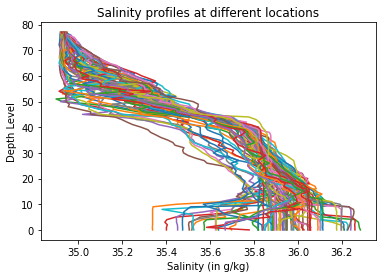

Text(0.5, 1.0, 'Salinity profiles at different locations')

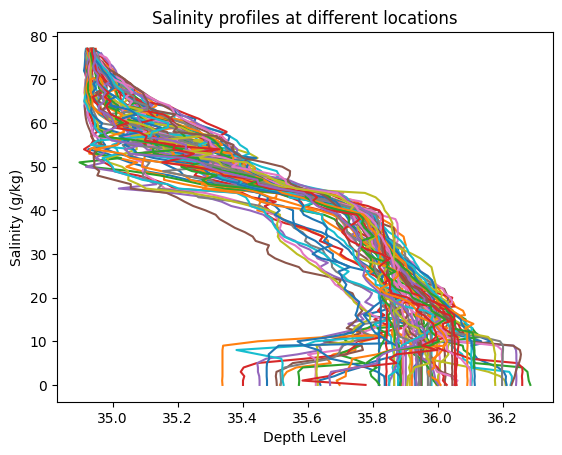

In [37]:
plt.plot(S,level); # The semi-colon prevents printing the line objects
plt.xlabel("Depth Level") # Takes a string as argument
plt.ylabel("Salinity (g/kg)")
plt.title("Salinity profiles at different locations")

Make more plots below:

Text(0.5, 1.0, 'Temperature profiles at different locations')

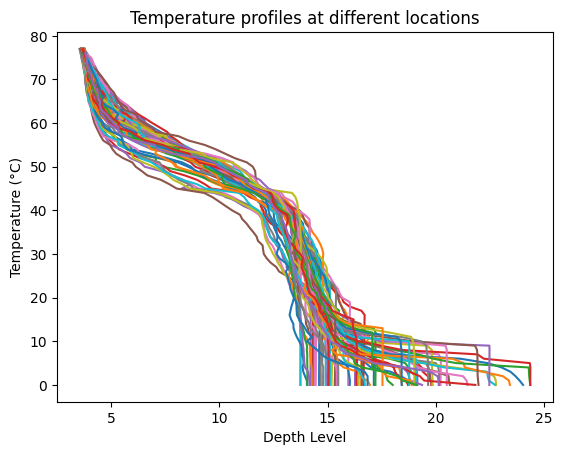

In [38]:
plt.plot(T,level); # The semi-colon prevents printing the line objects
plt.xlabel("Depth Level") # Takes a string as argument
plt.ylabel("Temperature (°C)")
plt.title("Temperature profiles at different locations")

Text(0.5, 1.0, 'Pressure profiles at different locations')

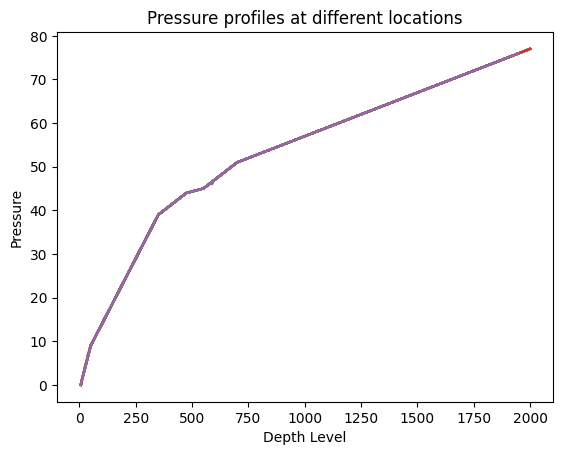

In [39]:
plt.plot(P,level); # The semi-colon prevents printing the line objects
plt.xlabel("Depth Level") # Takes a string as argument
plt.ylabel("Pressure")
plt.title("Pressure profiles at different locations")

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [40]:
print(relative_density.shape)
relative_density_mean = np.mean(relative_density,axis=1)
print(relative_density_mean.shape)

(78, 75)
(78,)


In [51]:
# Compute the means, ignoring missing values
T_mean = np.mean(T,axis=1)  #0  -> par colonne
S_mean = np.mean(S,axis=1)
P_mean = np.mean(P,axis=1)
level_mean = np.mean(level,axis=0) # level shape is (78,0)
print(S_mean.shape)

(78,)


... and the standard deviations.

In [52]:
T_std  = np.std(T, axis=1)
S_std  = np.std(S, axis=1)
P_std  = np.std(P, axis=1)
relative_density_std = np.std(relative_density, axis=1)
print(S_std.shape)

(78,)


Check that they have the same shape as your vertical level `lev` coordinate:

In [53]:
np.testing.assert_equal(S_std.shape,level.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

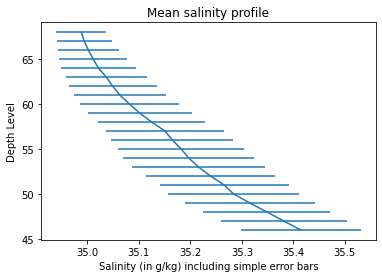

Text(0.5, 1.0, 'Mean salinity profile')

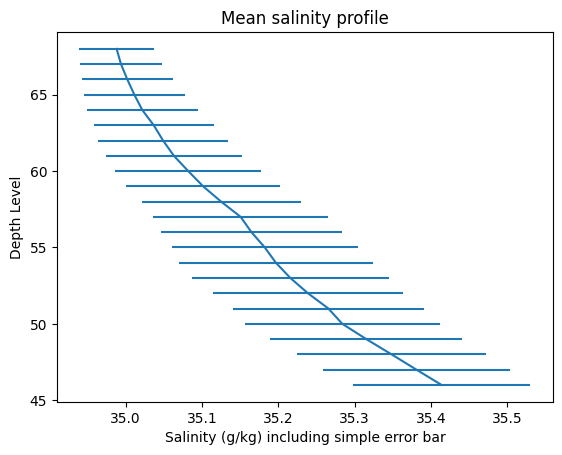

In [54]:
plt.errorbar(S_mean,level,xerr=S_std)
plt.xlabel("Salinity (g/kg) including simple error bar")
plt.ylabel("Depth Level")
plt.title("Mean salinity profile")

Three more plots and we'll be all set! 🙂

Text(0.5, 1.0, 'Mean temperature profile')

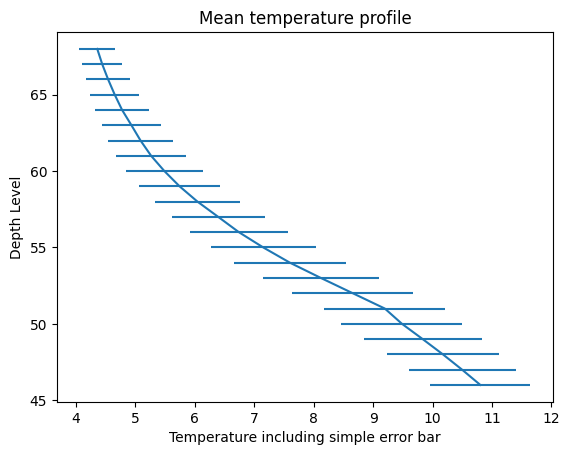

In [55]:
plt.errorbar(T_mean,level,xerr=T_std)
plt.xlabel("Temperature including simple error bar")
plt.ylabel("Depth Level")
plt.title("Mean temperature profile")

Text(0.5, 1.0, 'Mean pression profile')

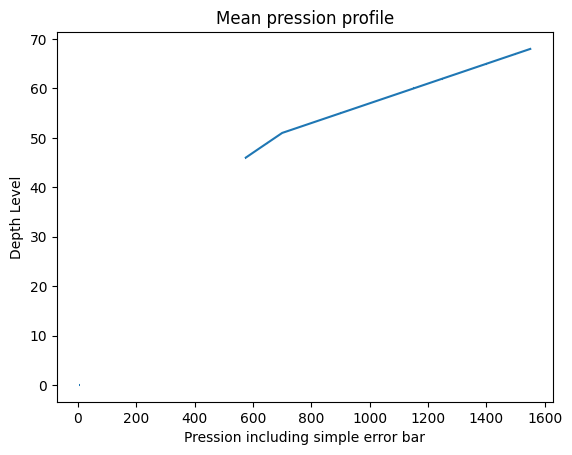

In [58]:
plt.errorbar(P_mean,level,xerr=P_std)
plt.xlabel("Pression including simple error bar")
plt.ylabel("Depth Level")
plt.title("Mean pression profile")
#plt.gca().invert_yaxis() #inverser l'axe y

Text(0.5, 1.0, 'Mean seawater density profile')

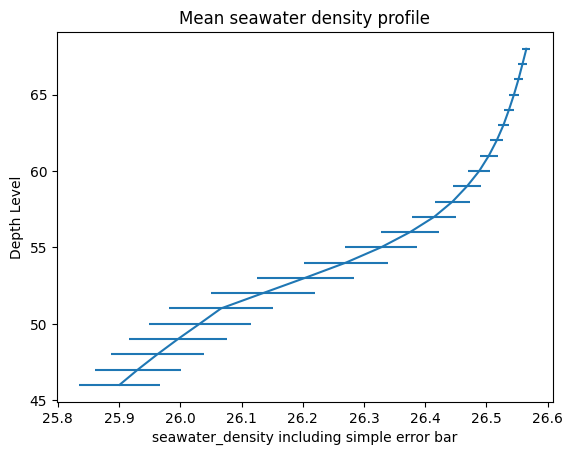

In [59]:
relative_density_mean
plt.errorbar(relative_density_mean,level,xerr=relative_density_std)
plt.xlabel("seawater_density including simple error bar")
plt.ylabel("Depth Level")
plt.title("Mean seawater density profile")

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [60]:
# Compute the means, ignoring missing values
T_mean_na = np.nanmean(T,axis=1)
S_mean_na = np.nanmean(S,axis=1)
P_mean_na = np.nanmean(P,axis=1)
level_mean_na = np.nanmean(level,axis=0)

Similarly, recalculate the standard deviations ignoring the missing values.

In [61]:
T_mean_na = np.nanstd(T,axis=1)
S_mean_na = np.nanstd(S,axis=1)
P_mean_na = np.nanstd(P,axis=1)
level_mean_na = np.nanstd(level,axis=0)

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

(75,)
(75,)


Text(0.5, 1.0, 'Coordinates ')

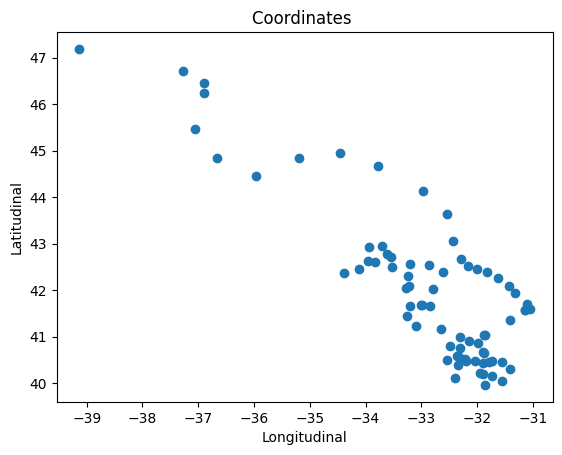

In [62]:
# Vérifie
print(lon.shape)  # (75,)
print(lat.shape) # (75,)
plt.scatter(lon,lat)
plt.xlabel("Longitudinal") # Fancy bonuses
plt.ylabel("Latitudinal")# More fancy bonuses
plt.title("Coordinates ")